In [2]:
import pandas as pd
from pylab import rcParams
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn import metrics 
import seaborn as sns
from yellowbrick.regressor import ResidualsPlot
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as sm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,PowerTransformer,PolynomialFeatures
from sklearn.linear_model import LinearRegression
import operator
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange

# *International Trade Regression Models - Australia*

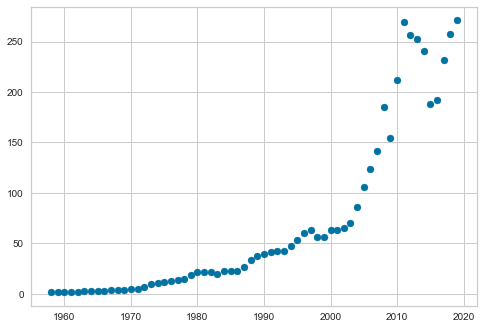

In [3]:
df=pd.read_csv("../Datasets/trade.csv")
df=df[df['LOCATION']=='AUS']
df[['TIME','Value']]
plt.scatter(df['TIME'],df['Value'])

In [3]:
x=[i for i in df['TIME']]
y=[i for i in df['Value']]
x_array=x
y_array=y
x=np.asarray(x)
y=np.asarray(y)
x = x[:, np.newaxis]
y = y[:, np.newaxis]
l=int(len(x)*.8)
x_train,x_test=x[:l],x[l:]
y_train,y_test=y[:l],y[l:]

In [4]:
y=list(y)
y.remove([191.9768])
y.remove([188.1291])
x=list(x)
x.remove([2016])
x.remove([2015])

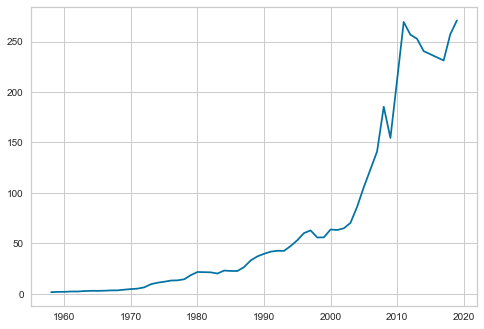

In [5]:
plt.plot(x,y)

# Polynomial Regression Model(degree-4)

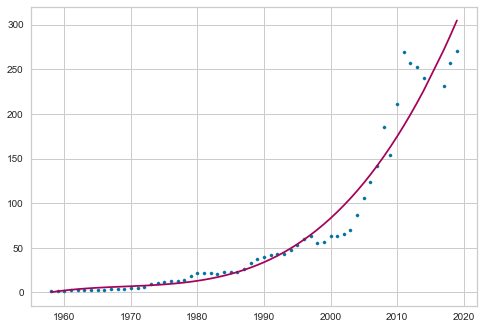

rmse 74.72957230879437
r2 -2.1615604284619803


In [6]:
polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()
polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(x_train)
model = LinearRegression()
model.fit(x_poly, y_train)
x_test_poly=polynomial_features.fit_transform(x_test)
y_poly_pred = model.predict(x_test_poly)
rmse = np.sqrt(mean_squared_error(y_poly_pred,y_test))
r2 = r2_score(y_test,y_poly_pred)
print("rmse",rmse)
print("r2",r2)

In [8]:
scaler = StandardScaler()
dataset={'x':np.asarray(x).reshape(1,len(x))[0],'y':np.asarray(y).reshape(1,len(y))[0]}
df_data=pd.DataFrame(dataset)

normalized = scaler.fit_transform(df_data)
# inverse transform
inverse = scaler.inverse_transform(normalized)
tobescaled=[]
for i in range(len(x)):
    tobescaled.append([x[i][0],y[i][0]])
tobescaled=np.asarray(tobescaled)
scaled = scaler.fit_transform(tobescaled)
x_scaled=[]
for i in range(len(x)):
        x_scaled.append([scaled[i][0]])
y_scaled=[]
for i in range(len(y)):
        y_scaled.append(scaled[i][1])
l=int(len(x)*.90)
x_train,x_test=x_scaled[:l],x_scaled[l:]
y_train,y_test=y_scaled[:l],y_scaled[l:]

# Support Vector Regression(SVR)

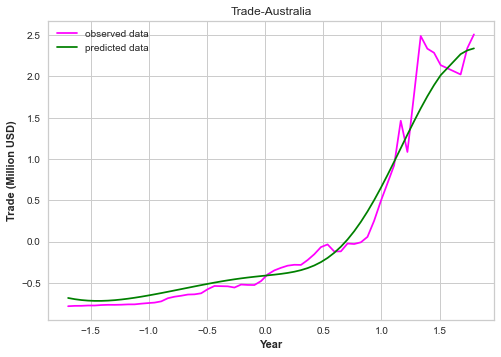

In [9]:
regressor = SVR(kernel='rbf')
regressor.fit(x_scaled,y_scaled)
y_svr_pred=regressor.predict(x_test)
y_pred = regressor.predict(x_scaled)
plt.plot(x_scaled, y_scaled, color = 'magenta')
plt.plot(x_scaled, regressor.predict(x_scaled), color = 'green')
plt.title('Trade-Australia')
plt.legend(['observed data','predicted data'])
plt.xlabel('Year', fontweight ='bold') 
plt.ylabel('Trade (Million USD)', fontweight ='bold')
plt.show()

In [10]:
l=int(len(x)*.8)
x_train,x_test=x_scaled[:l],x_scaled[l:]
y_train,y_test=y_scaled[:l],y_scaled[l:]
y_svr_pred=regressor.predict(x_test)
rmse = np.sqrt(mean_squared_error(regressor.predict(x_train),y_train))
r2 = r2_score(y_train,regressor.predict(x_train))
print("rmse",rmse)
print("r2",r2)

rmse 0.10898426614227046
r2 0.8800036467364302


In [12]:
sc_x=StandardScaler()
sc_x.fit_transform(x)
sc_y=StandardScaler()
sc_y.fit_transform(y)
y_pred = sc_y.inverse_transform ((regressor.predict (sc_x.transform(np.array([[2020]])))))

In [13]:
y_pred

array([257.43332689])

**predicted value for the year-2020**

In [14]:
#############################################################################################################################
#############################################################################################################################
#############################################################################################################################
#############################################################################################################################

# *International Trade Regression Models - India*

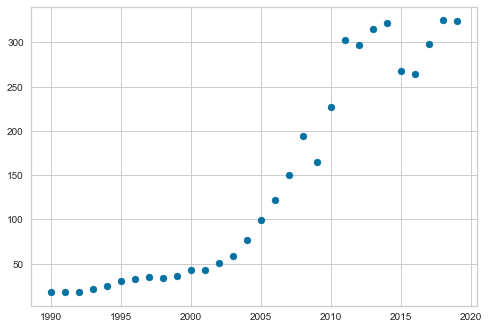

In [4]:
df=pd.read_csv("../Datasets/trade.csv")
df=df[df['LOCATION']=='IND']
df[['TIME','Value']]
plt.scatter(df['TIME'],df['Value'])
x=[i for i in df['TIME']]
y=[i for i in df['Value']]
x_array=x
y_array=y
x=np.asarray(x)
y=np.asarray(y)
x = x[:, np.newaxis]
y = y[:, np.newaxis]
l=int(len(x)*.8)
x_train,x_test=x[:l],x[l:]
y_train,y_test=y[:l],y[l:]

In [16]:
y=list(y)
y.remove([268.0791])
y.remove([264.6742])
y.remove([298.2488])
x=list(x)
x.remove([2016])
x.remove([2015])
x.remove([2017])

# Polynomial Regression Model(degree-2)

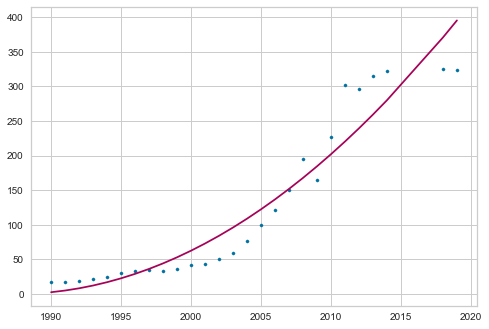

rmse 242.83503684926316
r2 -88.05070906906904


In [17]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()
polynomial_features= PolynomialFeatures(degree=5)
x_poly = polynomial_features.fit_transform(x_train)
model = LinearRegression()
model.fit(x_poly, y_train)
x_test_poly=polynomial_features.fit_transform(x_test)
y_poly_pred = model.predict(x_test_poly)
rmse = np.sqrt(mean_squared_error(y_poly_pred,y_test))
r2 = r2_score(y_test,y_poly_pred)
print("rmse",rmse)
print("r2",r2)

In [18]:
dataset={'x':np.asarray(x).reshape(1,len(x))[0],'y':np.asarray(y).reshape(1,len(y))[0]}
df_data=pd.DataFrame(dataset)
normalized = scaler.fit_transform(df_data)
# inverse transform
inverse = scaler.inverse_transform(normalized)
tobescaled=[]
for i in range(len(x)):
    tobescaled.append([x[i][0],y[i][0]])
tobescaled=np.asarray(tobescaled)
scaler = StandardScaler()
scaled = scaler.fit_transform(tobescaled)
x_scaled=[]
for i in range(len(x)):
        x_scaled.append([scaled[i][0]])
y_scaled=[]
for i in range(len(y)):
        y_scaled.append(scaled[i][1])
x_scaled=x_scaled[:-2]
y_scaled=y_scaled[:-2]
l=int(len(x)*.8)
x_train,x_test=x_scaled[:l],x_scaled[l:]
y_train,y_test=y_scaled[:l],y_scaled[l:]

# Support Vector Regression(SVR)

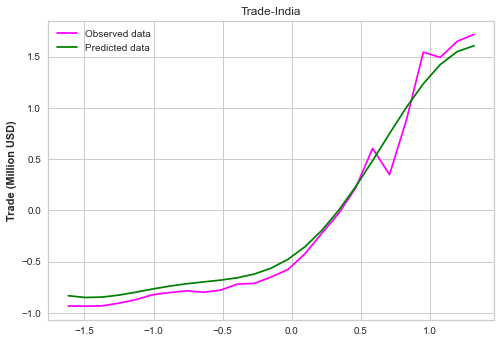

In [19]:
regressor = SVR(kernel='rbf')
regressor.fit(x_scaled,y_scaled)
y_pred = regressor.predict(x_scaled)
plt.plot(x_scaled, y_scaled, color = 'magenta')
plt.plot(x_scaled, regressor.predict(x_scaled), color = 'green')
plt.title('Trade-India')
plt.legend(['Observed data','Predicted data'])
plt.ylabel('Trade (Million USD)', fontweight ='bold')
plt.show()

In [20]:
l=int(len(x)*.8)
x_train,x_test=x_scaled[:l],x_scaled[l:]
y_train,y_test=y_scaled[:l],y_scaled[l:]
y_svr_pred=regressor.predict(x_test)
rmse = np.sqrt(mean_squared_error(regressor.predict(x_train),y_train))
r2 = r2_score(y_train,regressor.predict(x_train))
print("rmse",rmse)
print("r2",r2)

rmse 0.1182769974768703
r2 0.9517314447104632


In [21]:
sc_x=StandardScaler()
sc_x.fit_transform(x)
sc_y=StandardScaler()
sc_y.fit_transform(y)
y_pred = sc_y.inverse_transform ((regressor.predict (sc_x.transform(np.array([[2020]])))))

In [22]:
y_pred

array([221.66747735])

**predicted value for the year-2020**

In [23]:
#############################################################################################################################
#############################################################################################################################
#############################################################################################################################
#############################################################################################################################

# *International Trade Regression Models - South Africa*

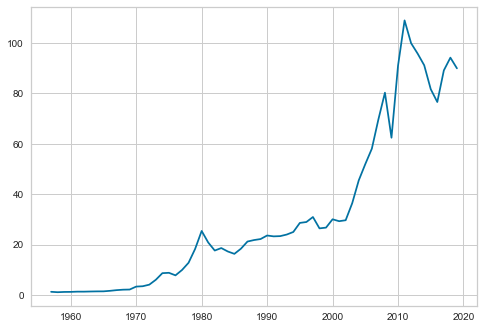

In [5]:
df=pd.read_csv("../Datasets/trade.csv")
df=df[df['LOCATION']=='ZAF']
plt.plot(df['TIME'],df['Value'])

In [25]:
x=[i for i in df['TIME']]
y=[i for i in df['Value']]
x_array=x
y_array=y
x=np.asarray(x)
y=np.asarray(y)
x = x[:, np.newaxis]
y = y[:, np.newaxis]
l=int(len(x)*.8)
x_train,x_test=x[:l],x[l:]
y_train,y_test=y[:l],y[l:]

# Polynomial Regression Model(degree-2)

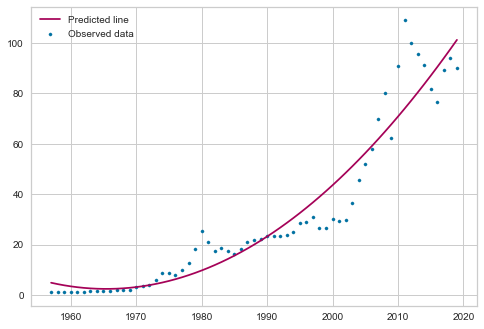

rmse 33.480658693994116
r2 -6.630949864906526


In [26]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.legend(['Predicted line','Observed data'])
plt.show()
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x_train)
model = LinearRegression()
model.fit(x_poly, y_train)
x_test_poly=polynomial_features.fit_transform(x_test)
y_poly_pred = model.predict(x_test_poly)
rmse = np.sqrt(mean_squared_error(y_poly_pred,y_test))
r2 = r2_score(y_test,y_poly_pred)
print("rmse",rmse)
print("r2",r2)

In [27]:
dataset={'x':np.asarray(x).reshape(1,len(x))[0],'y':np.asarray(y).reshape(1,len(y))[0]}
df_data=pd.DataFrame(dataset)
tobescaled=[]
for i in range(len(x)):
    tobescaled.append([x[i][0],y[i][0]])
tobescaled=np.asarray(tobescaled)
scaler = StandardScaler()
scaled = scaler.fit_transform(tobescaled)
x_scaled=[]
for i in range(len(x)):
        x_scaled.append([scaled[i][0]])
y_scaled=[]
for i in range(len(y)):
        y_scaled.append(scaled[i][1])

# Support Vector Regression(SVR)

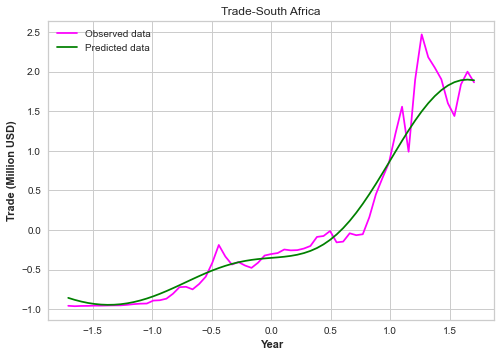

In [28]:
l=int(len(x)*.8)
x_train,x_test=x_scaled[:l],x_scaled[l:]
y_train,y_test=y_scaled[:l],y_scaled[l:]
regressor = SVR(kernel='rbf')
regressor.fit(x_scaled,y_scaled)
y_pred = regressor.predict(x_scaled)
plt.plot(x_scaled, y_scaled, color = 'magenta')
plt.plot(x_scaled, regressor.predict(x_scaled), color = 'green')
plt.title('Trade-South Africa')
plt.legend(['Observed data','Predicted data'])
plt.xlabel('Year', fontweight ='bold')
plt.ylabel('Trade (Million USD)', fontweight ='bold')
plt.show()

In [29]:
l=int(len(x)*.8)
x_train,x_test=x_scaled[:l],x_scaled[l:]
y_train,y_test=y_scaled[:l],y_scaled[l:]
y_svr_pred=regressor.predict(x_train)
rmse = np.sqrt(mean_squared_error(regressor.predict(x_train),y_train))
r2 = r2_score(y_train,regressor.predict(x_train))
print("rmse",rmse)
print("r2",r2)

rmse 0.11650125521217002
r2 0.9308005580144181


In [30]:
y_svr_pred=regressor.predict(x_test)
sc_x=StandardScaler()
sc_x.fit_transform(x)
sc_y=StandardScaler()
sc_y.fit_transform(y)
y_pred = sc_y.inverse_transform ((regressor.predict (sc_x.transform(np.array([[2020]])))))

In [31]:
y_pred

array([89.9684205])

**predicted value for the year-2020**